In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [2]:
train_df = pd.read_csv("pulsar_data_train.csv")
test_df = pd.read_csv("pulsar_data_test.csv")
train_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
test_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [4]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None
<class 'p

In [5]:
train_df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [6]:
test_df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

### Creating a dataframe called "testdf" out of 'test_df' which drops the target column as it can finally used for prediction of our classification model

In [7]:
testdf = test_df.drop(['target_class'] ,axis=1)
testdf.tail(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
5363,113.210938,42.025039,NaN,0.469897,0.647993,9.051728,21.955583,559.245245
5364,93.828125,51.244986,0.387653,0.011425,1.926421,19.543869,10.996804,NaN
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616
5369,110.679688,38.252642,0.459937,1.690689,4.434783,22.201794,5.939747,39.781374


### Creating a simple function to impute the null values with mean of that respective columns there is only numerical columns no need of dealing  with categorical variables.

In [8]:
def col_imputer(df):
    for col in df.columns:
        if df[col].isnull:
            df[col] = df[col].fillna(df[col].median())
    return df
col_imputer(train_df)
train_df.head(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.412402,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,18.412402,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,18.412402,-0.700809,-1.200653,0.0


In [9]:
col_imputer(testdf)
testdf.head(8)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268
5,85.476562,38.052793,0.227314,1.915097,2.637124,18.549670,9.001500,81.392046
6,120.203125,46.946339,0.028301,0.227984,2.925585,15.006252,8.077168,91.100734
7,131.921875,48.328564,0.227314,0.071303,4.380435,26.619201,6.530845,43.515761


In [10]:
print(train_df.isna().sum(),"\n\n")
print(testdf.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64 


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64


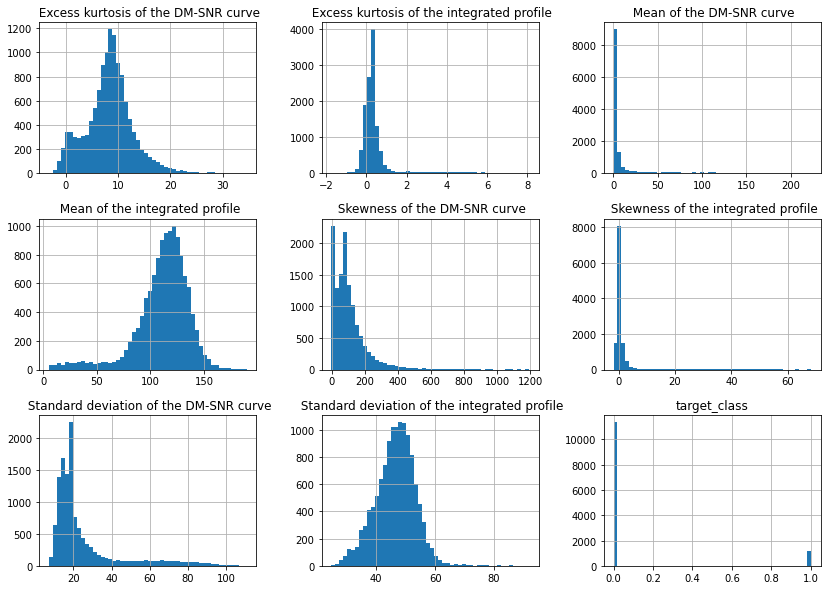

In [11]:
train_df.hist(bins=50,figsize=(14,10))
plt.show()


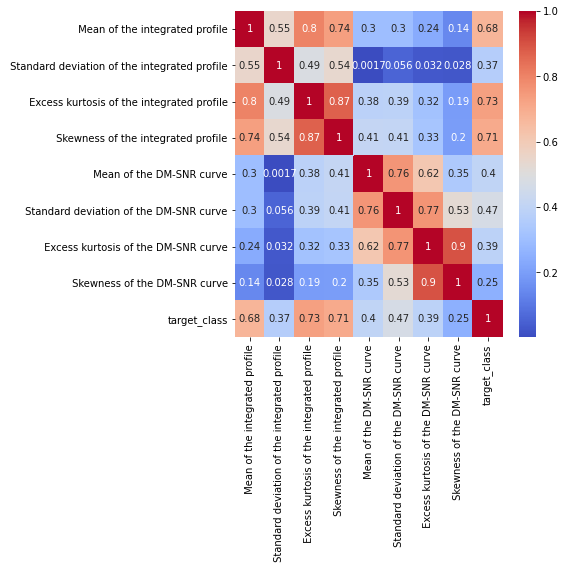

In [12]:
corr = train_df.corr().abs()
plt.figure(figsize=(6,6))
sns.heatmap(corr ,annot=True ,cmap="coolwarm")


**Applying feature scaling.**

In [13]:
from sklearn.preprocessing import MinMaxScaler
nor_scale = MinMaxScaler()


In [14]:
train_sc_df = train_df.iloc[:,:-1]
train_sc_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.412402,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128


In [15]:
train_tar = train_df.target_class
train_tar.head(3)

0    0.0
1    0.0
2    0.0
Name: target_class, dtype: float64

In [16]:
colset = train_sc_df.columns.to_list()
colset

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

In [17]:
scaled_train_feat = nor_scale.fit_transform(train_sc_df)
scaled_train_feat
dsf = pd.DataFrame(scaled_train_feat,columns=colset)
dsf.head(6)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.627134,0.352060,0.215498,0.025449,0.013301,0.106795,0.281035,0.056276
1,0.386883,0.170109,0.249901,0.074121,0.009840,0.098774,0.333180,0.087764
2,0.678405,0.424507,0.190815,0.021385,0.011386,0.145172,0.309127,0.063713
3,0.818749,0.359414,0.155190,0.023187,0.077668,0.106921,0.161823,0.007691
4,0.429488,0.169245,0.261333,0.072482,0.011597,0.128279,0.306384,0.065607
5,0.626327,0.334219,0.200634,0.026944,0.008207,0.106921,0.336667,0.095650


In [18]:
colset_2 = testdf.columns.to_list()

In [19]:
scaled_test_feat = nor_scale.transform(testdf)
scaled_test_feat
dsftest = pd.DataFrame(scaled_test_feat ,columns=colset_2)
dsftest.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.604027,0.360230,0.196182,0.023780,0.012711,0.100382,0.298889,0.067722
1,0.379365,0.143417,0.383737,0.149439,0.015984,0.140664,0.270374,0.048497
2,0.529904,0.331529,0.228632,0.037385,0.009144,0.079907,0.330946,0.089785
3,0.517968,0.355260,0.280340,0.042118,0.367560,0.717463,0.096191,0.000720
4,0.584020,0.355578,0.206939,0.029817,0.027355,0.186059,0.203811,0.019854


**Now we have scaled and make our features normally distributed.**

spliting up of data for that procedure.

In [20]:
# Assigning "X" with Features .
X = dsf
#Assigning "y" with target labels 
y = train_tar


**K-Fold stratified cross validation**

In [21]:
from sklearn.model_selection import StratifiedKFold
Accuracy_score = []
skf = StratifiedKFold(n_splits=10,random_state=None) 
#splitting feature and target into train &
#validation set
skf.get_n_splits(X,y)
for train_index,validation_index in skf.split(X,y):
    X_train , X_val = X.iloc[train_index] , X.iloc[validation_index]
    y_train , y_val = y.iloc[train_index] , y.iloc[validation_index]

In [22]:
#creating matrixes or numpy arrays for features.
def conv_arr(data):          #AS NUMPY ARRAYS AND VECTORS WILL SPED UP COMPUTATION
    return np.array(data)
X_train1 = conv_arr(X_train)
X_val1 = conv_arr(X_val)

#creating vectors for Target sets.
y_train1 = conv_arr(y_train).reshape(-1,1)
y_val1 = conv_arr(y_val).reshape(-1,1)



# Creating Classisfier for prediction.

In [23]:
#roc_auc function to calculate accuracy
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Ranodm Forest**


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train1,y_train1)
y_train_pred = rf_model.predict(X_train1)
print('RandFo train roc_auc:{}'.format(roc_auc_score(y_train1,y_train_pred)))
y_test_pred = rf_model.predict(X_val1)
print('RandFo test roc_auc:{}'.format(roc_auc_score(y_val1,y_test_pred)))

/home/ashin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandFo train roc_auc:0.9995183044315992
RandFo test roc_auc:0.8986807387862796


In [25]:
#ranodm fortest prediction function using probability function
rf_model = RandomForestClassifier()
rf_model.fit(X_train1, y_train1)
ytrain_pred = rf_model.predict_proba(X_train1)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train1, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_val1)
print('RF test roc-auc: {}'.format(roc_auc_score(y_val1, ytest_pred[:,1])))



/home/ashin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF train roc-auc: 1.0
RF test roc-auc: 0.9693319567129365


**Adaboost classifier**

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train1,y_train1)
ytrain_pred = ada_classifier.predict_proba(X_train1)
print('Ada train roc-auc: {}'.format(roc_auc_score(y_train1, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_val1)
print('Ada test roc-auc: {}'.format(roc_auc_score(y_val1, ytest_pred[:,1])))


/home/ashin/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Ada train roc-auc: 0.9854930025696704
Ada test roc-auc: 0.9736759588543459


**knn classifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train1,y_train1)
ytrain_pred = knn_classifier.predict_proba(X_train1)
print('knn train roc-auc: {}'.format(roc_auc_score(y_train1, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_val1)
print('knn test roc-auc: {}'.format(roc_auc_score(y_val1, ytest_pred[:,1])))

/home/ashin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train roc-auc: 0.9958152521058538
knn test roc-auc: 0.9243814768077702


In [28]:
#To select best threshold for maximum accuracy
pred=[]
for model in [rf_model,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_val1)[:,1]))
#To convert in a single data frame
final_pred = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc_auc:{}'.format(roc_auc_score(y_val1,final_pred)))


Ensemble test roc_auc:0.9801078352644258


In [29]:
# list of prediction probability for each algorithm 
pred

[0       0.02
 1       0.01
 2       0.00
 3       0.07
 4       0.01
         ... 
 1247    0.00
 1248    0.00
 1249    0.03
 1250    0.00
 1251    0.04
 Length: 1252, dtype: float64,
 0       0.483115
 1       0.468275
 2       0.448934
 3       0.483673
 4       0.462097
           ...   
 1247    0.467052
 1248    0.487796
 1249    0.482348
 1250    0.404521
 1251    0.468738
 Length: 1252, dtype: float64,
 0       0.2
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 1247    0.0
 1248    0.0
 1249    0.0
 1250    0.0
 1251    0.0
 Length: 1252, dtype: float64]

In [30]:
#Concatinated list of all algorithms
pd.concat(pred,axis=1)

,0,1,2
0,0.02,0.483115,0.2
1,0.01,0.468275,0.0
2,0.00,0.448934,0.0
3,0.07,0.483673,0.0
4,0.01,0.462097,0.0
...,...,...,...
1247,0.00,0.467052,0.0
1248,0.00,0.487796,0.0
1249,0.03,0.482348,0.0
1250,0.00,0.404521,0.0


In [31]:
#To get best prediction taking the mean of the algorithms
final_pred

0       0.234372
1       0.159425
2       0.149645
3       0.184558
4       0.157366
          ...   
1247    0.155684
1248    0.162599
1249    0.170783
1250    0.134840
1251    0.169579
Length: 1252, dtype: float64

In [32]:
#Finding fpr,tpr,thresholds to plot ROC curve
fpr,tpr,thresholds =roc_curve(y_val1,final_pred)
thresholds

array([1.89979748, 0.89979748, 0.87464235, 0.87457895, 0.8721905 ,
       0.87190116, 0.87078034, 0.87055447, 0.86184106, 0.84843126,
       0.84199534, 0.8403598 , 0.83702647, 0.83607953, 0.83366033,
       0.8327462 , 0.69428591, 0.6746609 , 0.56436387, 0.55204877,
       0.4812481 , 0.4777522 , 0.46678139, 0.43334932, 0.333489  ,
       0.31490817, 0.31310824, 0.30104459, 0.29402345, 0.24996007,
       0.24969284, 0.24673584, 0.24412623, 0.2310383 , 0.23093001,
       0.21627402, 0.21539528, 0.20011472, 0.20007477, 0.19964784,
       0.1982415 , 0.19566832, 0.19544453, 0.1943168 , 0.19351804,
       0.18190901, 0.18157483, 0.1811014 , 0.18044764, 0.1788248 ,
       0.17870671, 0.17767778, 0.17722335, 0.17458143, 0.17426334,
       0.17331231, 0.17319096, 0.17317015, 0.17311297, 0.17259987,
       0.17257775, 0.17124995, 0.1710383 , 0.1709961 , 0.17098346,
       0.16937824, 0.16925393, 0.16803022, 0.16798671, 0.16769447,
       0.16765013, 0.16723843, 0.16707183, 0.16547381, 0.16544

In [33]:
from sklearn.metrics import accuracy_score
acc_lst=[]
for thrd in thresholds:
    y_pred = np.where(final_pred >thrd,1,0)
    acc_lst.append(accuracy_score(y_val1,y_pred))
    

In [34]:
acc_lst = pd.concat([pd.Series(thresholds), pd.Series(acc_lst)],axis=1)
acc_lst


,0,1
0,1.899797,0.908147
1,0.899797,0.908147
2,0.874642,0.916134
3,0.874579,0.916933
4,0.872191,0.920128
...,...,...
307,0.106225,0.123003
308,0.105847,0.118211
309,0.105530,0.113419
310,0.105136,0.105431


In [35]:
acc_lst.head()

,0,1
0,1.899797,0.908147
1,0.899797,0.908147
2,0.874642,0.916134
3,0.874579,0.916933
4,0.872191,0.920128


In [36]:
acc_lst.sort_values(by=1, ascending=False, inplace=True)

In [37]:
# 0 :Thresholds
#1 :Accuracy
acc_lst

,0,1
24,0.333489,0.979233
25,0.314908,0.977636
23,0.433349,0.976837
26,0.313108,0.976837
22,0.466781,0.976837
...,...,...
307,0.106225,0.123003
308,0.105847,0.118211
309,0.105530,0.113419
310,0.105136,0.105431


In [38]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

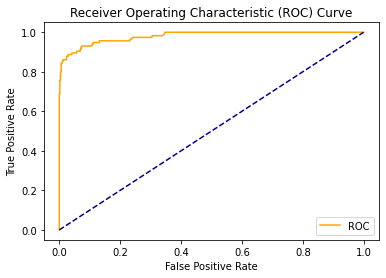

In [39]:
plot_roc_curve(fpr,tpr)